In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with ItemKNN model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.iknn import ItemKNN

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = ItemKNN

K = [10, 100, 200, 500, 1000, 2000]
NORMALIZE = [False, True]
HYPERPARAMS = {'k': K, 'normalize': NORMALIZE}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model ItemKNN with hyperparameters {'k': 10, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.112
Average Recall@100 0.196
Average nDCG@100 0.077
Training model ItemKNN with hyperparameters {'k': 100, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.124
Average Recall@100 0.275
Average nDCG@100 0.097
Training model ItemKNN with hyperparameters {'k': 200, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.134
Average Recall@100 0.28
Average nDCG@100 0.1
Training model ItemKNN with hyperparameters {'k': 500, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.142
Average Recall@100 0.293
Average nDCG@100 0.106
Training model ItemKNN with hyperparameters {'k': 1000, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.144
Average Recall@100 0.304
Average nDCG@100 0.109
Training model ItemKNN with hyperparameters {'k': 2000, 'normalize': False}
Evaluating with 2000 users
Average Recall@20 0.146
Averag

/home/joey/Documents/Informatica/PhD/2020-2021/SI EDLAE/Code/env/lib/python3.8/site-packages/scipy/sparse/base.py:595: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Evaluating with 2000 users
Average Recall@20 0.123
Average Recall@100 0.191
Average nDCG@100 0.084
Training model ItemKNN with hyperparameters {'k': 100, 'normalize': True}
Evaluating with 2000 users
Average Recall@20 0.128
Average Recall@100 0.286
Average nDCG@100 0.095
Training model ItemKNN with hyperparameters {'k': 200, 'normalize': True}
Evaluating with 2000 users
Average Recall@20 0.125
Average Recall@100 0.29
Average nDCG@100 0.093
Training model ItemKNN with hyperparameters {'k': 500, 'normalize': True}
Evaluating with 2000 users
Average Recall@20 0.105
Average Recall@100 0.278
Average nDCG@100 0.085
Training model ItemKNN with hyperparameters {'k': 1000, 'normalize': True}
Evaluating with 2000 users
Average Recall@20 0.098
Average Recall@100 0.275
Average nDCG@100 0.082
Training model ItemKNN with hyperparameters {'k': 2000, 'normalize': True}
Evaluating with 2000 users
Average Recall@20 0.097
Average Recall@100 0.269
Average nDCG@100 0.079



In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.10976203607917201 achieved with {'k': 2000, 'normalize': False}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

CPU times: user 1.67 s, sys: 296 ms, total: 1.97 s
Wall time: 1.97 s


In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.15
Average Recall@100 0.309
Average nDCG@100 0.103


## Plot amount of items from long tail recommended

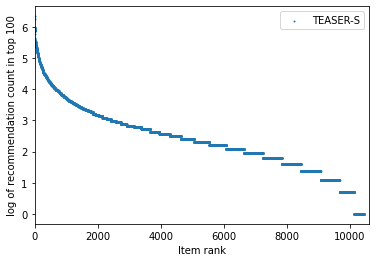

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)